<a href="https://colab.research.google.com/github/alemezrin/Optimizacion-I/blob/main/Optimizacion_con_Restricciones_(trust_constr_SLSQP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimización con Restricciones**

Analizaremos los siguientes 2 metodos que nos sirven para la obtención de minimos en funciones multivariables con restricciones mixtas:

> **1.** Metodo de ***trust-constr***.

> **2.** Metodo de ***SLSQP***.

Para analizar estos metodos utilizaremos 2 Problemas cada uno con su funcion objetivo.




## **Problema # 1**

$$\max_{x,y} = (x+3)^2+y^2 $$

<br>

**Sujeto a:**

> <dl>
  <dt><b><i>Restricción Lineal:</b></i></dt>
  <dd>$$-x+y ≤ 2$$ <BR>
  $$\left[ \array{- \infty } \right] \leq \left[ \array{-1 & 1} \right] \left[ \array{x \\ y } \right] \leq \left[ \array{2 } \right] $$</dd>
  <BR>
  <dt><b><i>Restricción no-Lineal:</b></i></dt>
  <dd>$$x^2-y ≤ 4$$ <BR>
  $$\left[ \array{- \infty } \right] \leq \left[ \array{1 & -1} \right] \left[ \array{x^2 \\ y } \right] \leq \left[ \array{4 } \right] $$</dd>
</dl>

<br>


Podemos observar que el problema es de restricciones mixtas ya que cuenta con una restricción lineal y otra restricción no-lineal.

<br>

###***Función Objetivo***


$$R(x,y)= (x+3)^2+y^2$$

>***Jacobiano de R:***

$$ J_{R} (x,y)= \begin{pmatrix} 2(x+3) \\ 2y  \end{pmatrix}  $$ 

>***Hessiano de R:***

$$ H_{R} (x,y)= \begin{pmatrix} 2  & 0  \\ 0 & 2 \end{pmatrix}  $$ 

#### ***Curvas de nivel***


In [66]:
# Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

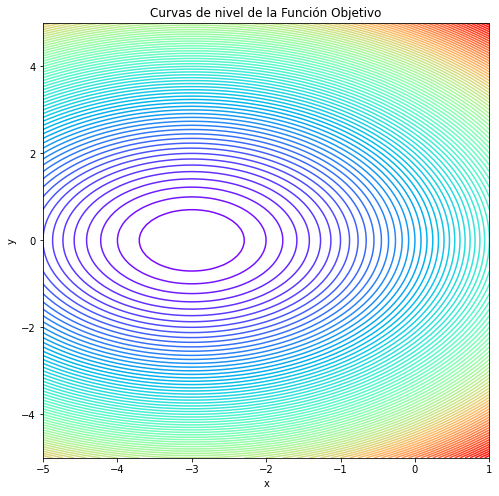

In [67]:
# Definimos "brakets"
x_minF1, x_maxF1 = -5, 1
y_minF1, y_maxF1 = -5, 5 

# Definimos partición de los "brakets"
xxF1 = np.linspace(x_minF1,x_maxF1,100) # Patición x
yyF1 = np.linspace(y_minF1,y_maxF1,100) # Patición y

# Definimos malla
XF1, YF1 = np.meshgrid(xxF1, yyF1)

# Defino nuestra función objetivo
def F1(x):
  return (x[0]+3)**2+x[1]**2   ## donde x es una lista de 2 elementos.

Z = F1([XF1,YF1])

# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XF1, YF1, Z, 100, cmap="rainbow") #coolwarm linestyles="dotted"

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curvas de nivel de la Función Objetivo")

# Imprimimos las curvas de nivel
plt.show()

#### ***Grafica 3D***

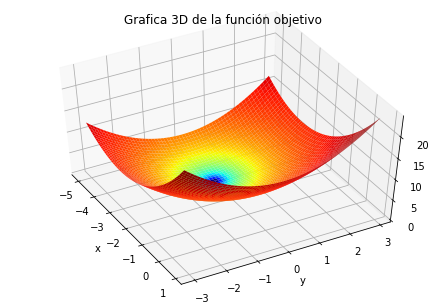

In [68]:
# Definimos la funcion
R = lambda X,Y: (X+3)**2 + Y**2;

# Inicializamos la figura
fig = plt.figure()
axR = Axes3D(fig, azim = -29, elev = 49)

# Evaluamos la funcion
XR3D = np.arange(-5, 1, 0.1)
YR3D = np.arange(-3, 3, 0.1)
XR3D, YR3D = np.meshgrid(XR3D, YR3D)
Zr = R(XR3D,YR3D)
axR.plot_surface(XR3D, YR3D, Zr, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica 3D de la función objetivo")

# Imprimimos la superficie
plt.show()

#### ***Punto de partida para el proceso de optimizacion***

In [69]:
# Defino el Jacobiano
def JF1(x):
  der = np.zeros_like(x)
  der[0]= 2*(x[0]+3)
  der[1]= 2*x[1]
  return der

# Defino el Hessiano
def HF1(x):
  x = np.asarray(x)
  H = np.diag([2 , 2 ])
  H[1,0]= 0
  H[0,1]= 0
  return H

# Defino restriccion lineal
restriccionLinealF1=[-1,1]
F1Lineal= optimize.LinearConstraint(restriccionLinealF1,-np.inf,[2]) 

# Defino restriccion No-lineal
def restriccionNoLinealF1(x):
  return x[0]**2-x[1]
F1NoLineal= optimize.NonlinearConstraint(restriccionNoLinealF1,-np.inf,4) 

#####***Metodo trust-constr***

In [70]:
# Definimos el punto de partida para el proceso de optimización de la funcion objetivo
x0F1 = [-5,5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0F1 = [x0F1[0]]
liY0F1 = [x0F1[1]]
liF0F1 = [F1(x0F1)]

#Función store
def storeF1(X,V):
    global liX0F1
    global liY0F1
    global liF0F1
    x, y = X
    liX0F1.append(x)
    liY0F1.append(y)
    liF0F1.append(F1(X))

##### ***Metodo SLSQP***

In [71]:
# Definimos el punto de partida para el proceso de optimización de la funcion objetivo
x0F2 = [-5,5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0F2 = [x0F2[0]]
liY0F2 = [x0F2[1]]
liF0F2 = [F1(x0F2)]

#Función store
def storeF2(X):
    global liX0F2
    global liY0F2
    global liF0F2
    x, y = X
    liX0F2.append(x)
    liY0F2.append(y)
    liF0F2.append(F1(X))

####***Optimizacion trust-constr***

In [72]:
# Optimizamos
optF1=optimize.minimize(F1, x0F1, callback=storeF1, method='trust-constr', jac=JF1, hess=HF1, constraints=[F1Lineal ,F1NoLineal])
optF1

 barrier_parameter: 3.200000000000001e-05
 barrier_tolerance: 3.200000000000001e-05
          cg_niter: 16
      cg_stop_cond: 4
            constr: [array([1.99993708]), array([3.999832])]
       constr_nfev: [0, 42]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.04097318649291992
               fun: 1.000092374602644
              grad: array([ 2.00009237e+00, -3.34750203e-05])
               jac: [array([[-1,  1]]), array([[-3.99990766, -1.        ]])]
   lagrangian_grad: array([1.09738618e-09, 1.52698199e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 14
              nhev: 14
               nit: 19
             niter: 19
              njev: 14
        optimality: 1.5269819853003241e-09
            status: 1
           success: True
         tr_radius: 111249.80501255451
                 v: [array([0.40005264]), array([0.400

In [73]:
print('Número de iteraciones realizadas: ', optF1.niter)
print('Óptimo encontrado: ', optF1.x)

Número de iteraciones realizadas:  19
Óptimo encontrado:  [-1.99995381e+00 -1.67375101e-05]


##### ***Graficas de Optimización***

In [74]:
# Iteracciones en x
liX0F1

[-5,
 -5.0,
 -4.167352741631035,
 -2.4627306067508647,
 -2.200848515346387,
 -1.8644901322606064,
 -1.978673662781145,
 -1.8560189786322445,
 -1.9013373449266089,
 -1.9013373449266089,
 -1.9723902272877696,
 -1.9794234510623487,
 -1.9794234510623487,
 -1.9954064172899804,
 -1.9954064172899804,
 -1.9991385029744975,
 -1.9991385029744975,
 -1.9998211186256065,
 -1.9998211186256065,
 -1.999953813905328]

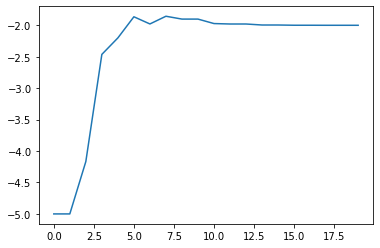

In [75]:
# Grafica de Iteracciones en x
plt.plot(liX0F1)

In [76]:
# Iteracciones en y
liY0F1

[5,
 5.0,
 4.631862560727238,
 0.576401727031489,
 0.15473404277780894,
 0.23679726481435323,
 0.1434485668554004,
 -0.31514942357137354,
 -0.12988199347898172,
 -0.12988199347898172,
 -0.054419137279211716,
 -0.02630681049505873,
 -0.02630681049505873,
 -0.007189668030019136,
 -0.007189668030019136,
 -0.0009557567197402798,
 -0.0009557567197402798,
 -0.0005085122113461236,
 -0.0005085122113461236,
 -1.6737510137288165e-05]

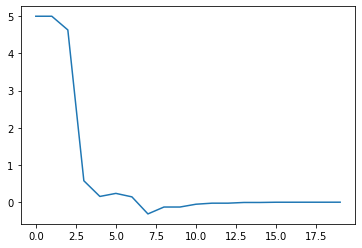

In [77]:
# Grafica de Iteracciones en y
plt.plot(liY0F1)

In [78]:
liF0F1

[29,
 29.0,
 22.81686320486018,
 0.620897351847177,
 0.6625857194184386,
 1.3454556043570938,
 1.0636849784297506,
 1.408011736426982,
 1.2239289618829874,
 1.2239289618829874,
 1.0589432874758955,
 1.042268540519909,
 1.042268540519909,
 1.009259957748535,
 1.009259957748535,
 1.0017246496990373,
 1.0017246496990373,
 1.000358053332002,
 1.000358053332002,
 1.000092374602644]

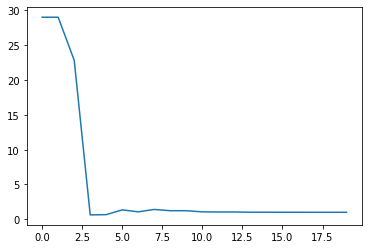

In [79]:
plt.plot(liF0F1)

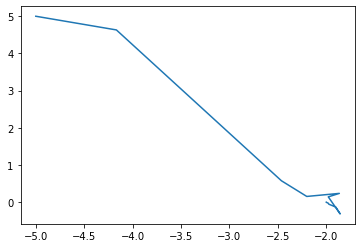

In [80]:
# Imprimimos Optimizacion
plt.plot(liX0F1,liY0F1)

##### ***Grafica de Error Absoluto***

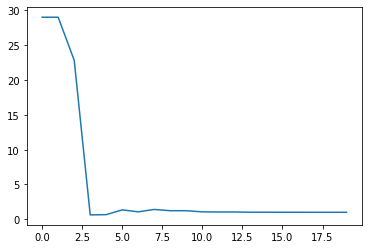

In [81]:
# Error Absoluto
plt.plot(np.abs(liF0F1))

##### ***Grafica de Optimización trust-constr sobre las curvas de nivel***

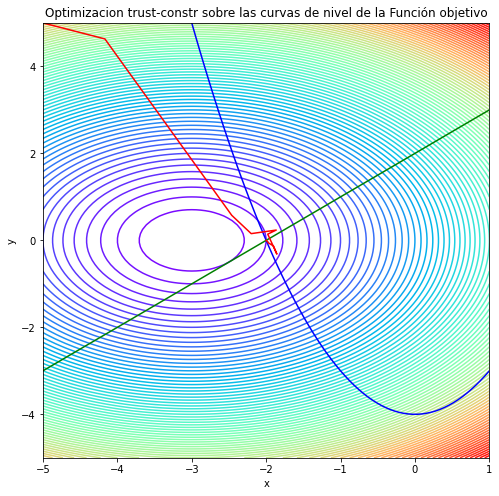

In [82]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XF1, YF1, Z, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0F1,liY0F1, color='red')

## Restriccion no-lineal
R1=XF1**2 -YF1-4
plt.contour(XF1, YF1, R1, [0], colors='blue')

## Restriccion lineal
R2=-XF1+YF1-2
plt.contour(XF1, YF1, R2, [0], colors='green')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion trust-constr sobre las curvas de nivel de la Función objetivo")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

####***Optimizacion SLSQP***

In [83]:
# Optimizamos
optF2 = minimize(F1, x0F2, callback=storeF2, method = 'SLSQP', jac=JF1, hess=HF1, constraints =[F1Lineal ,F1NoLineal])
optF2

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  RuntimeWarning)


     fun: 0.9999999999964464
     jac: array([ 2.00000000e+00, -3.55292321e-12])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-2.0000000e+00, -1.7764616e-12])

In [84]:
print('Número de iteraciones realizadas: ', optF2.nit)
print('Óptimo encontrado: ', optF2.x)

Número de iteraciones realizadas:  6
Óptimo encontrado:  [-2.0000000e+00 -1.7764616e-12]


##### ***Graficas de Optimización***

In [85]:
# Iteracciones en x
liX0F2

[-5,
 -1.0,
 -2.1428571428571423,
 -2.0038610034131756,
 -2.0000029768822505,
 -2.000000000001777,
 -2.000000000001777]

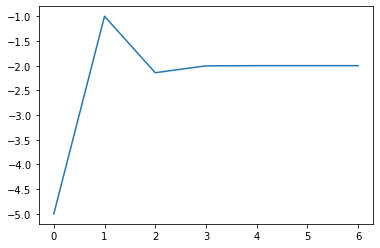

In [86]:
# Grafica de Iteracciones en x
plt.plot(liX0F2)

In [87]:
# Iteracciones en y
liY0F2

[5,
 -5.0,
 -0.14285714285714307,
 -0.0038610034131756343,
 -2.976882250183086e-06,
 -1.7764616033997822e-12,
 -1.7764616033997822e-12]

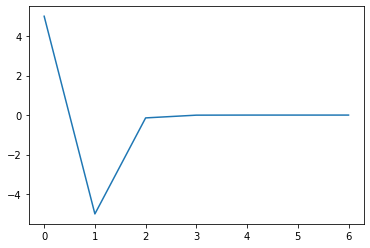

In [88]:
# Grafica de Iteracciones en y
plt.plot(liY0F2)

In [89]:
liF0F2

[29,
 29.0,
 0.7551020408163274,
 0.9923078078683618,
 0.9999940462532226,
 0.9999999999964464,
 0.9999999999964464]

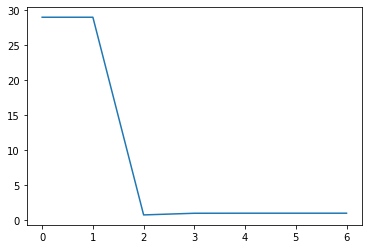

In [90]:
plt.plot(liF0F2)

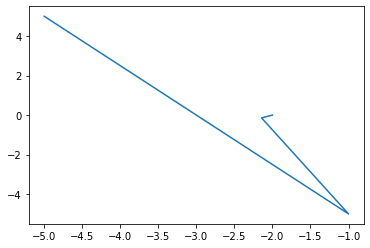

In [91]:
# Imprimimos Optimizacion
plt.plot(liX0F2,liY0F2)

##### ***Grafica de Error Absoluto***

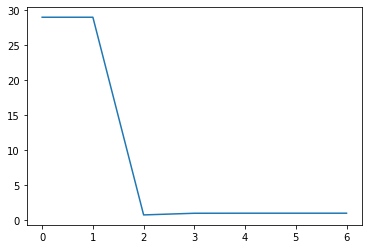

In [92]:
# Error Absoluto
plt.plot(np.abs(liF0F2))

##### ***Grafica de Optimización SLSQP sobre las curvas de nivel***

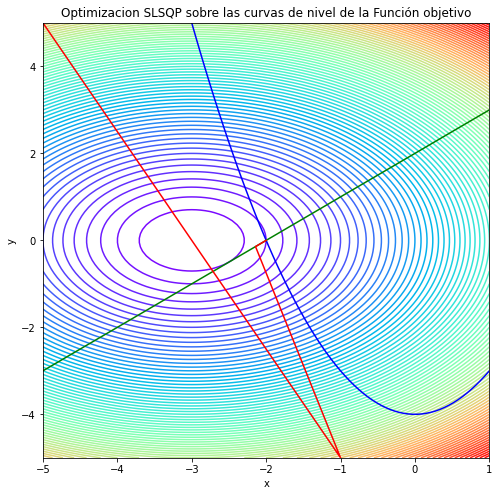

In [93]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XF1, YF1, Z, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0F2,liY0F2, color='red')

## Restriccion no-lineal
S1=XF1**2 -YF1-4
plt.contour(XF1, YF1, S1, [0], colors='blue')

## Restriccion lineal
S2=-XF1+YF1-2
plt.contour(XF1, YF1, S2, [0], colors='green')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion SLSQP sobre las curvas de nivel de la Función objetivo")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()


## **Problema # 2**

$$\min_{x,y} = x^2-y $$

<br>

**Sujeto a:**

> <dl>
  <dt><b><i>Restricción Lineal:</b></i></dt>
  <dd>$$x+y = 2$$ $$-x ≤ -1$$<BR>
  $$\left[ \array{2 \\ - \infty } \right] \leq \left[ \array{1 & 1 \\ -1 & 0} \right] \left[ \array{x \\ y } \right] \leq \left[ \array{2 \\ -1 } \right] $$</dd>
  <BR>
  <dt><b><i>Restricción no-Lineal:</b></i></dt>
  <dd>$$x^2+y^2 ≤ 4$$ <BR>
  $$\left[ \array{- \infty } \right] \leq \left[ \array{1 & 1} \right] \left[ \array{x^2 \\ y^2 } \right] \leq \left[ \array{4 } \right] $$</dd>
</dl>

<br>


Podemos observar que el problema es de restricciones mixtas ya que cuenta con 2 restricciones lineales y una restricción no-lineal.

<br>

###***Función Objetivo***


$$R(x,y)= x^2-y $$

>***Jacobiano de R:***

$$ J_{R} (x,y)= \begin{pmatrix} 2x \\ -1  \end{pmatrix}  $$ 

>***Hessiano de R:***

$$ H_{R} (x,y)= \begin{pmatrix} 2  & 0  \\ 0 & 0 \end{pmatrix}  $$ 

#### ***Curvas de nivel***


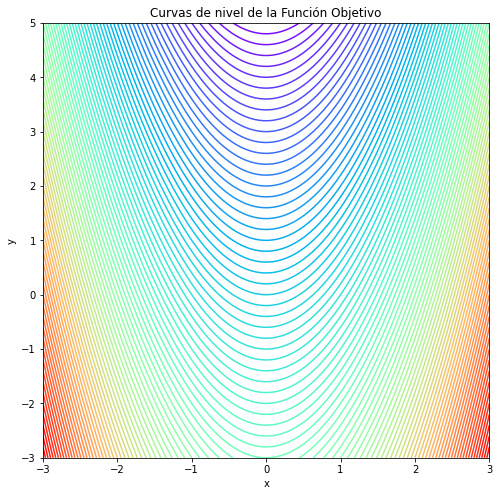

In [94]:
# Definimos "brakets"
x_minG1, x_maxG1 = -3, 3
y_minG1, y_maxG1 = -3, 5 

# Definimos partición de los "brakets"
xxG1 = np.linspace(x_minG1,x_maxG1,100) # Patición x
yyG1 = np.linspace(y_minG1,y_maxG1,100) # Patición y

# Definimos malla
XG1, YG1 = np.meshgrid(xxG1, yyG1)

# Defino nuestra función objetivo
def G1(x):
  return x[0]**2-x[1]   ## donde x es una lista de 2 elementos.

K = G1([XG1,YG1])

# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XG1, YG1, K, 100, cmap="rainbow") #coolwarm linestyles="dotted"

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curvas de nivel de la Función Objetivo")

# Imprimimos las curvas de nivel
plt.show()

#### ***Grafica 3D***

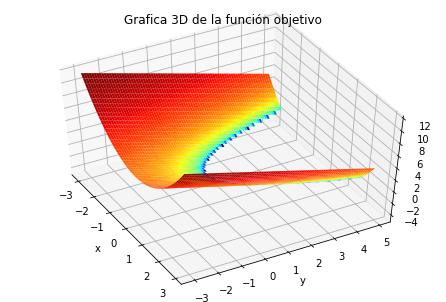

In [95]:
# Definimos la funcion
G = lambda X,Y: X**2 - Y;

# Inicializamos la figura
fig = plt.figure()
axG = Axes3D(fig, azim = -29, elev = 49)

# Evaluamos la funcion
XG3D = np.arange(-3, 3, 0.1)
YG3D = np.arange(-3, 5, 0.1)
XG3D, YG3D = np.meshgrid(XG3D, YG3D)
Zg = G(XG3D,YG3D)
axG.plot_surface(XG3D, YG3D, Zg, rstride = 1, cstride = 1, norm = LogNorm(), cmap = cm.jet)

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Grafica 3D de la función objetivo")

# Imprimimos la superficie
plt.show()

#### ***Punto de partida para el proceso de optimizacion***

In [96]:
# Defino el Jacobiano
def JG1(x):
  der = np.zeros_like(x)
  der[0]= 2*x[0]
  der[1]= -1
  return der

# Defino el Hessiano
def HG1(x):
  x = np.asarray(x)
  H = np.diag([2 , 0 ])
  H[1,0]= 0
  H[0,1]= 0
  return H

# Defino restriccion lineal
restriccionLinealG1=[[1,1],[-1,0]]
G1Lineal= optimize.LinearConstraint(restriccionLinealG1,[2,-np.inf],[2,-1]) 

# Defino restriccion No-lineal
def restriccionNoLinealG1(x):
  return x[0]**2+x[1]**2
G1NoLineal= optimize.NonlinearConstraint(restriccionNoLinealG1,-np.inf,4) 

#####***Metodo trust-constr***

In [97]:
# Definimos el punto de partida para el proceso de optimización de la funcion objetivo
x0G1 = [-3,5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0G1 = [x0G1[0]]
liY0G1 = [x0G1[1]]
liF0G1 = [G1(x0G1)]

#Función store
def storeG1(X,V):
    global liX0G1
    global liY0G1
    global liF0G1
    x, y = X
    liX0G1.append(x)
    liY0G1.append(y)
    liF0G1.append(G1(X))

##### ***Metodo SLSQP***

In [98]:
# Definimos el punto de partida para el proceso de optimización de la funcion objetivo
x0G2 = [-3,5]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX0G2 = [x0G2[0]]
liY0G2 = [x0G2[1]]
liF0G2 = [G1(x0G2)]

#Función store
def storeG2(X):
    global liX0G2
    global liY0G2
    global liF0G2
    x, y = X
    liX0G2.append(x)
    liY0G2.append(y)
    liF0G2.append(G1(X))

####***Optimizacion trust-constr***

In [99]:
# Optimizamos
optG1=optimize.minimize(G1, x0G1, callback=storeG1, method='trust-constr', jac=JG1, hess=HG1, constraints=[G1Lineal ,G1NoLineal])
optG1

 barrier_parameter: 0.0008000000000000003
 barrier_tolerance: 0.0008000000000000003
          cg_niter: 17
      cg_stop_cond: 1
            constr: [array([ 2.       , -1.0002674]), array([2.00000014])]
       constr_nfev: [0, 54]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.06363987922668457
               fun: 0.0008022784866231758
              grad: array([ 2.0005348, -1.       ])
               jac: [array([[ 1,  1],
       [-1,  0]]), array([[2.00053481, 1.9994652 ]])]
   lagrangian_grad: array([ 6.28423590e-10, -6.28423642e-10])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 18
              nhev: 13
               nit: 21
             niter: 21
              njev: 13
        optimality: 6.284236417916991e-10
            status: 1
           success: True
         tr_radius: 200.4259762901628
                 v: [array([0.9

In [100]:
print('Número de iteraciones realizadas: ', optG1.niter)
print('Óptimo encontrado: ', optG1.x)

Número de iteraciones realizadas:  21
Óptimo encontrado:  [1.0002674 0.9997326]


##### ***Graficas de Optimización***

In [101]:
# Iteracciones en x
liX0G1

[-3,
 -3.0,
 -2.5446239775526673,
 -1.19655142309482,
 -0.5595479725553755,
 0.0026024541700392367,
 0.0026024541700392367,
 0.0026024541700392367,
 0.39016283602625457,
 0.39016283602625457,
 0.5799657390707705,
 0.5799657390707705,
 0.7558547678109948,
 0.7558547678109948,
 0.901407300300348,
 1.032283793938253,
 1.032283793938253,
 1.0070239403838666,
 1.0070239403838666,
 1.001353175739187,
 1.001353175739187,
 1.0002674023275395]

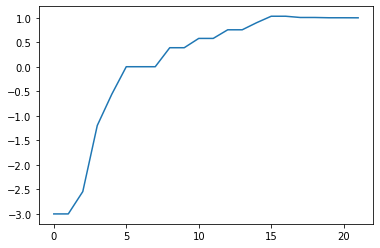

In [102]:
# Grafica de Iteracciones en x
plt.plot(liX0G1)

In [103]:
# Iteracciones en y
liY0G1

[5,
 5.0,
 4.284136188002037,
 2.388293706437013,
 1.7149340921709095,
 1.5236119063493876,
 1.5236119063493876,
 1.5236119063493876,
 1.6396808497188018,
 1.6396808497188018,
 1.3500777049702433,
 1.3500777049702433,
 1.2012804287424832,
 1.2012804287424832,
 1.0663280541306444,
 0.967716206061747,
 0.967716206061747,
 0.9929760596161334,
 0.9929760596161334,
 0.9986468242608132,
 0.9986468242608132,
 0.9997325976724606]

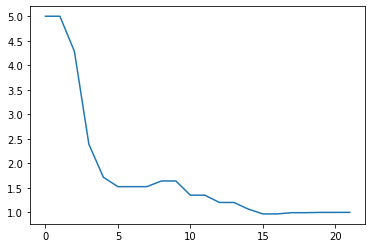

In [104]:
# Grafica de Iteracciones en y
plt.plot(liY0G1)

In [105]:
liF0G1

[4,
 4.0,
 2.1909749991339202,
 -0.956558398326774,
 -1.4018401585800784,
 -1.5236051335816805,
 -1.5236051335816805,
 -1.5236051335816805,
 -1.4874538111027518,
 -1.4874538111027518,
 -1.0137174464743381,
 -1.0137174464743381,
 -0.6299639987198703,
 -0.6299639987198703,
 -0.2537929330958826,
 0.09789362516580646,
 0.09789362516580646,
 0.021121156890115733,
 0.021121156890115733,
 0.0040613583021417154,
 0.0040613583021417154,
 0.0008022784866231758]

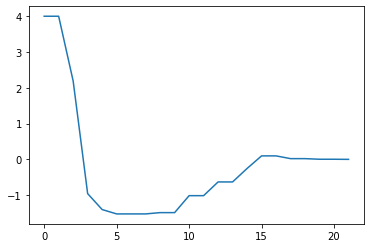

In [106]:
plt.plot(liF0G1)

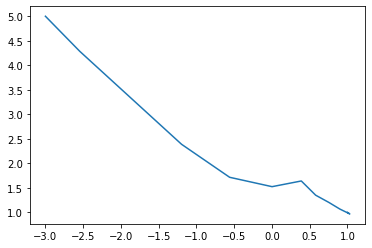

In [107]:
# Imprimimos Optimizacion
plt.plot(liX0G1,liY0G1)

##### ***Grafica de Error Absoluto***

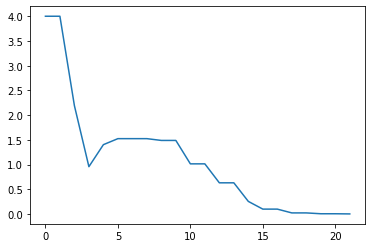

In [108]:
# Error Absoluto
plt.plot(np.abs(liF0G1))

##### ***Grafica de Optimización trust-constr sobre las curvas de nivel***

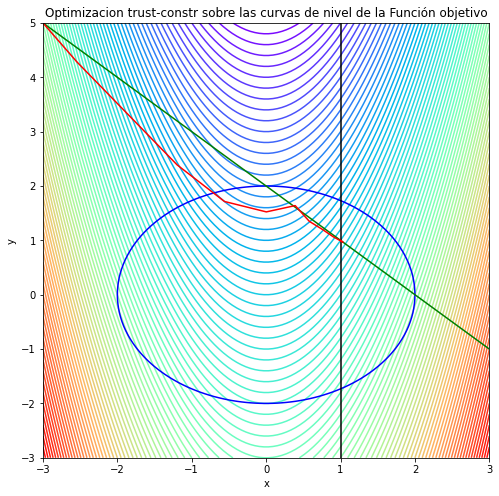

In [109]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XG1, YG1, K, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0G1,liY0G1, color='red')

## Restriccion no-lineal
T1= XG1**2 + YG1**2 - 4
plt.contour(XG1, YG1, T1, [0], colors='blue')

## Restriccion lineal 1
T2= XG1 + YG1 - 2
plt.contour(XG1, YG1, T2, [0], colors='green')

## Restriccion lineal 3
T3= - XG1 + 1
plt.contour(XG1, YG1, T3, [0], colors='black')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion trust-constr sobre las curvas de nivel de la Función objetivo")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

####***Optimizacion SLSQP***

In [110]:
# Optimizamos
optG2 = minimize(G1, x0G2, callback=storeG2, method = 'SLSQP', jac=JG1, hess=HG1, constraints =[G1Lineal ,G1NoLineal])
optG2

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method SLSQP does not use Hessian information (hess).
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_constraints.py:410: OptimizeWarning: Equality and inequality constraints are specified in the same element of the constraint list. For efficient use with this method, equality and inequality constraints should be specified in separate elements of the constraint list. 
  "in separate elements of the constraint list. ", OptimizeWarning)


     fun: -2.6645352591003757e-15
     jac: array([ 2., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 2
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1., 1.])

In [111]:
print('Número de iteraciones realizadas: ', optG2.nit)
print('Óptimo encontrado: ', optG2.x)

Número de iteraciones realizadas:  2
Óptimo encontrado:  [1. 1.]


##### ***Graficas de Optimización***

In [112]:
# Iteracciones en x
liX0G2

[-3, 0.9999999999999991, 0.9999999999999991]

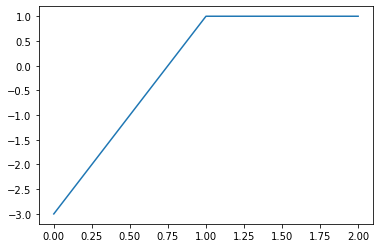

In [113]:
# Grafica de Iteracciones en x
plt.plot(liX0G2)

In [114]:
# Iteracciones en y
liY0G2

[5, 1.0000000000000009, 1.0000000000000009]

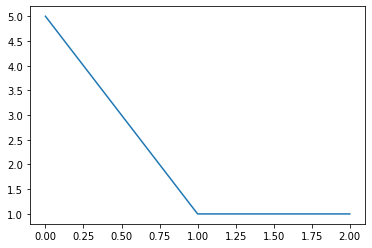

In [115]:
# Grafica de Iteracciones en y
plt.plot(liY0G2)

In [116]:
liF0G2

[4, -2.6645352591003757e-15, -2.6645352591003757e-15]

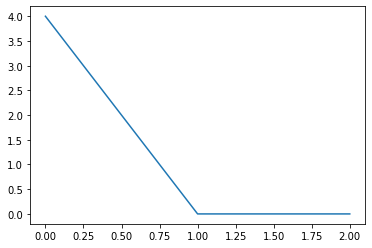

In [117]:
plt.plot(liF0G2)

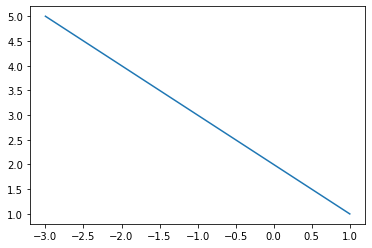

In [118]:
# Imprimimos Optimizacion
plt.plot(liX0G2,liY0G2)

##### ***Grafica de Error Absoluto***

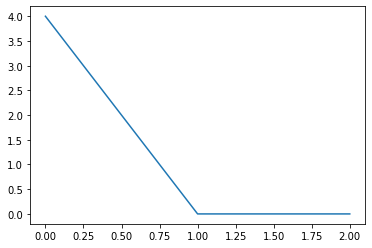

In [119]:
# Error Absoluto
plt.plot(np.abs(liF0G2))

##### ***Grafica de Optimización SLSQP sobre las curvas de nivel***

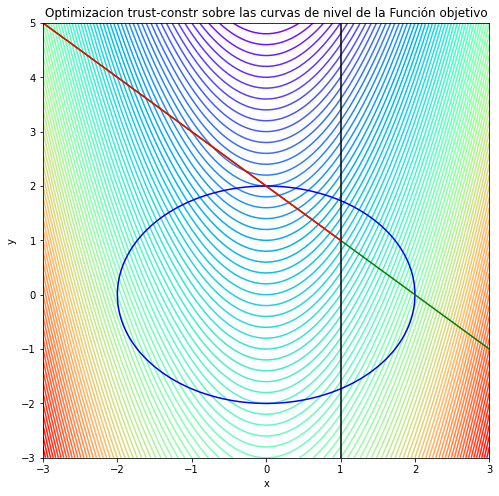

In [120]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XG1, YG1, K, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX0G2,liY0G2, color='red')

## Restriccion no-lineal
T1= XG1**2 + YG1**2 - 4
plt.contour(XG1, YG1, T1, [0], colors='blue')

## Restriccion lineal 1
T2= XG1 + YG1 - 2
plt.contour(XG1, YG1, T2, [0], colors='green')

## Restriccion lineal 3
T3= - XG1 + 1
plt.contour(XG1, YG1, T3, [0], colors='black')

# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizacion trust-constr sobre las curvas de nivel de la Función objetivo")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

## **Comparacion de Metodos (Conclusiones)**

### **Problema # 1**

#### ***Optimización***
<table>
  <tr>
    <th> Metodo </th>
    <th> # Iteracciones </th>
  </tr>

  <tr>
    <td>trust-constr</td>
    <td>19</td>
  </tr>

  <tr>
    <td>SLSQP</td>
    <td>6</td> 
  </tr>

</table>

<br>

Como podemos observar en la tabla anterior el metodo de **SLSQP** es el que menos iteracciones utiliza concluyendo que tiene una mayor rapidez de convergencia.

#### ***Grafica de Optimización***

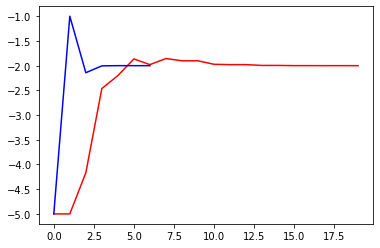

In [121]:
plt.plot(liX0F1, color='red') # trust-constr
plt.plot(liX0F2, color='blue') # SLSQP

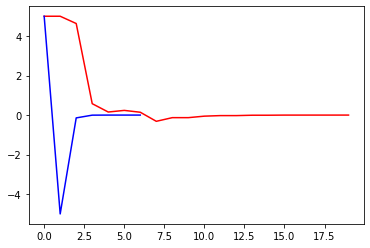

In [122]:
plt.plot(liY0F1, color='red') # trust-constr
plt.plot(liY0F2, color='blue') # SLSQP

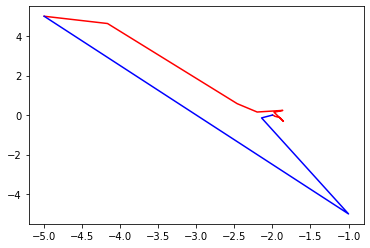

In [123]:
plt.plot(liX0F1, liY0F1, color='red') # trust-constr
plt.plot(liX0F2, liY0F2, color='blue') # SLSQP

#### ***Grafica de Optimización sobre las curvas de nivel***

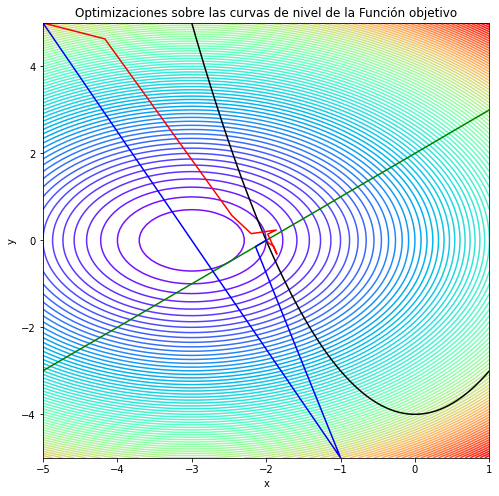

In [124]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XF1, YF1, Z, 100, cmap="rainbow") #coolwarm linestyles="dotted"

plt.plot(liX0F1,liY0F1, color='red') # trust-constr
plt.plot(liX0F2,liY0F2, color='blue') # SLSQP
plt.contour(XF1, YF1, R1, [0], colors='black') # Restriccion 1
plt.contour(XF1, YF1, R2, [0], colors='green') # Restriccion 2


# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizaciones sobre las curvas de nivel de la Función objetivo")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

De las restricciones podemos decir lo siguiente:

1.   La restricciones lineal y no-lineal son activas ya que son Linealmente Independientes.

#### ***Grafica de Error Absoluto***

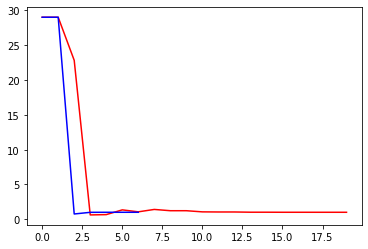

In [125]:
# Errores Absolutos
plt.plot(np.abs(liF0F1), color='red') # trust-constr
plt.plot(np.abs(liF0F2), color='blue') # SLSQP

De la grafica de los Errores Absolutos en la funcion objetivo podemos concluir lo siguiente:


1.   En el metodo de trust-constr el error se estabiliza en aproximadamente 10 iteracciones, de las 19 que utiliza, en un 52,6% de estas.
2.   En el metodo SLSQP el error se estabiliza en aproximadamente 2 iteracciones, de las 6 que utiliza, en un 33,3% de estas.
3.   Podemos decir que el metodo que menos iteracciones utilizo para estabilizar el error fue el metodo SLSQP.
6.   Podemos decir que el metodo mas rapido comparado con el numero de iteracciones para estabilizar el error es el metodo SLSQP.

### **Problema # 2**

#### ***Optimización***
<table>
  <tr>
    <th> Metodo </th>
    <th> # Iteracciones </th>
  </tr>

  <tr>
    <td>trust-constr</td>
    <td>21</td>
  </tr>

  <tr>
    <td>SLSQP</td>
    <td>2</td> 
  </tr>

</table>

<br>

Como podemos observar en la tabla anterior el metodo de **SLSQP** es el que menos iteracciones utiliza concluyendo que tiene una mayor rapidez de convergencia.

#### ***Grafica de Optimización***

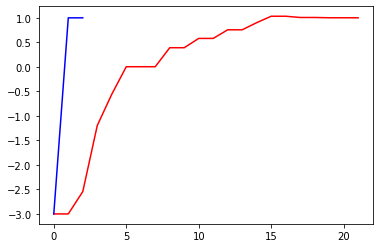

In [126]:
plt.plot(liX0G1, color='red') # trust-constr
plt.plot(liX0G2, color='blue') # SLSQP

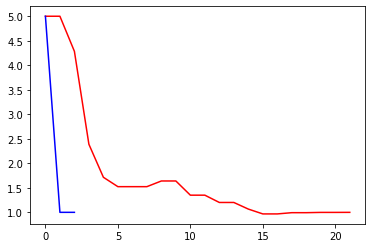

In [127]:
plt.plot(liY0G1, color='red') # trust-constr
plt.plot(liY0G2, color='blue') # SLSQP

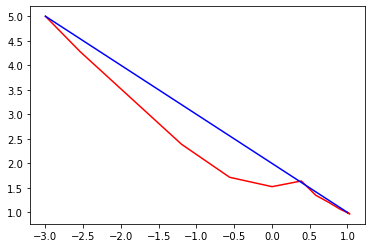

In [128]:
plt.plot(liX0G1, liY0G1, color='red') # trust-constr
plt.plot(liX0G2, liY0G2, color='blue') # SLSQP

#### ***Grafica de Optimización sobre las curvas de nivel***

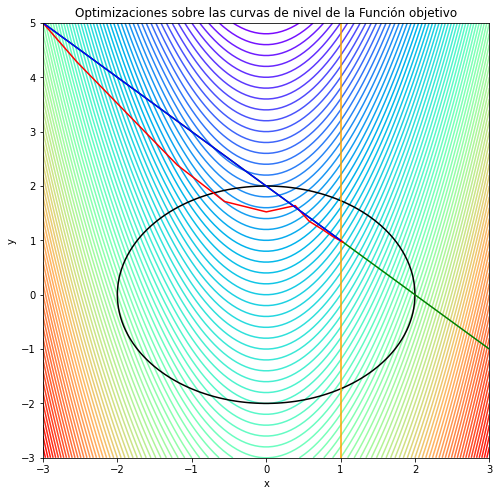

In [129]:
# Creamos las curvas de nivel
plt.figure(figsize=(8, 8))
plt.contour(XG1, YG1, K, 100, cmap="rainbow") #coolwarm linestyles="dotted"

plt.plot(liX0G1,liY0G1, color='red') # trust-constr
plt.plot(liX0G2,liY0G2, color='blue') # SLSQP
plt.contour(XG1, YG1, T1, [0], colors='black') # Restriccion 1
plt.contour(XG1, YG1, T2, [0], colors='green') # Restriccion 2
plt.contour(XG1, YG1, T3, [0], colors='orange') # Restriccion 3


# Colocamos titulo a la figura y a los ejes
plt.xlabel("x")
plt.ylabel("y")
plt.title("Optimizaciones sobre las curvas de nivel de la Función objetivo")

# Imprimimos la optimizacion en las curvas de nivel
plt.show()

De las restricciones podemos decir lo siguiente:

1.   La restricciones lineales son activas ya que son Linealmente Independientes.
2.   La restriccion no-lineal no es activas.

#### ***Grafica de Error Absoluto***

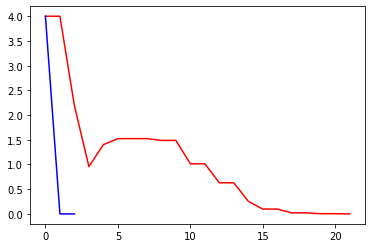

In [130]:
# Errores Absolutos
plt.plot(np.abs(liF0G1), color='red') # trust-constr
plt.plot(np.abs(liF0G2), color='blue') # SLSQP

De la grafica de los Errores Absolutos en la funcion objetivo podemos concluir lo siguiente:


1.   En el metodo de trust-constr el error se demora muchisimo en estabilizarse en aproximadamente 18 iteracciones, de las 21 que utiliza, en un 85,7% de estas.
2.   En el metodo SLSQP el error se estabiliza en aproximadamente 1 iteracciones, de las 2 que utiliza, en un 50,0% de estas.
3.   Podemos decir que el metodo que menos iteracciones utilizo para estabilizar el error fue el metodo SLSQP.
4.   Podemos decir que el metodo mas rapido comparado con el numero de iteracciones para estabilizar el error es el metodo SLSQP.

# **Referencias**

Prada, C. Optimización con restricciones.

Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.

https://docs.scipy.org/doc/scipy/tutorial/optimize.html